In [1]:
#LIBRARY 
from keras.datasets import mnist 

In [2]:
# train - test split
(train_images, train_labels) = mnist.load_data()[0] #  train

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
(test_images, test_labels) = mnist.load_data()[1] #  test

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

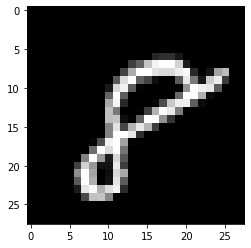

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[-1], cmap = "gray"); # gray_r reverse eder

In [12]:
# preparing data 

# 3d --- > 4d
train_images  = train_images.reshape(train_images.shape[0], 28,28,1)

test_images  = test_images.reshape(test_images.shape[0], 28,28,1)

#  normalizasyon (0 -1 arasına sıkıştırma)

train_images= train_images.astype("float32")
test_images  = test_images.astype("float32")

train_images /= 255 
test_images /= 255 

In [13]:
input_shape = (28,28,1)

In [17]:
# creating network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout,Flatten , MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=input_shape))# 1. conv.
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(filters=28, kernel_size=(2,2),input_shape=input_shape)) # 2. conv.
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) # vektör haline getirdim

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 28)        3164      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 28)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1008)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [19]:
# fitting model
history = model.fit(x = train_images,
                    y = train_labels,
                    epochs = 10)




Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4280 - accuracy: 0.8601
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1262 - accuracy: 0.9615
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0914 - accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0717 - accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598 - accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0432 - accuracy: 0.9861
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0375 - accuracy: 0.9882
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.028

In [20]:
model.metrics_names

['loss', 'accuracy']

In [22]:
import pandas as pd


In [23]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy
0,0.427972,0.860100
1,0.126152,0.961500
2,0.091372,0.971683
3,0.071656,0.978283
4,0.059812,0.980983


In [24]:
history_dict = history.history
print("Keys: " , history_dict.keys()) 

Keys:  dict_keys(['loss', 'accuracy'])


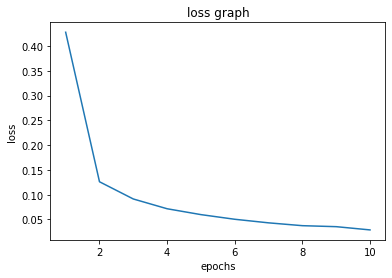

In [30]:
import matplotlib.pyplot as plt
epochs = range(1,11)
loss = history_dict["loss"]
accuracy = history_dict["accuracy"]

plt.plot(epochs, loss)
plt.title("loss graph")
plt.xlabel("epochs")
plt.ylabel("loss");



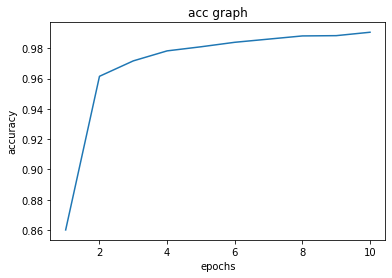

In [31]:
plt.plot(epochs,accuracy)
plt.title("acc graph")
plt.xlabel("epochs")
plt.ylabel("accuracy");

In [32]:
# saving model
model.save("mnist_model.h5")

In [33]:
# loading model and prediction
from keras.models import load_model
model = load_model("/content/mnist_model.h5")

pred 2


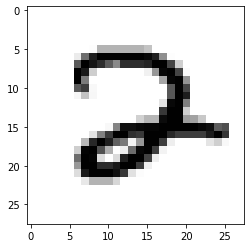

In [46]:
#test 
import random
i = random.randint(1,5000)
prediction  = model.predict(test_images[i].reshape(1,28,28,1)) # 4 boyutlu hale gettiriyor
print("pred", prediction.argmax())      

plt.imshow(test_images[i].reshape(28,28), cmap = "gray_r");